In [1]:
from matplotlib import pyplot as plt
import numpy as np
#%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import matplotlib
import scipy
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42
#import scipy.stats as stats
from statsmodels.stats import multicomp 
from scipy import stats
import dabest

import pandas as pd
import glob

# import tkinter as tk
# from tkinter import filedialog#to open dialog box to choose file
# from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [2]:
# Add heka_reader to PYTHONPATH
import sys
fpath = '/Users/Fechner/PythonStuff/heka_reader'
sys.path.append(fpath)

In [3]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Sensitivity

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Sensitivity


In [4]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Sensitivity'

In [5]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Sensitivity/'
filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename

#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
#certain file
filename = 'NormSensitivityNSAIDs-NoLEAK.xlsx'
filenameKm = 'AllVoltagesNSAIDs-NoLEAK.xlsx'
filenameMinus85 = 'AllCurrentsMinus85.xlsx'

filenameEIPA = 'NormSensitivityEIPA_Min60.xlsx'
filenameEIPAKm = 'AllVoltagesEIPA.xlsx'

filenameBmil = 'NormSensitivityBmil_Min60.xlsx'
filenameBmilKm = 'AllVoltagesBmil.xlsx'

locationFileEnantiomer = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM/AllRatioDrug-20190520.xlsx'

#open dialog box
#filename = filedialog.askopenfilename() #creates filename and directory. TODO: write conditional sentence
#root.update() # necessary in Mac(?) to close the dialog box


# common axis parameters for plots

In [6]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'
ModTime = np.arange(0-50,1100-50,1)

### load specific sheets from excel file

In [7]:
#pandas environment

### LOAD Norm Curves at Minus: norm to 1 and baseline Current subtracted
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

NormEIPA = pd.ExcelFile(filedir+filenameEIPA)
NormEIPA.sheet_names

NormBmil = pd.ExcelFile(filedir+filenameBmil)
NormBmil.sheet_names

### access specific sheet 
mg419_Ibu_Min100 = xl.parse("Mean-mg419-Ibu-Min100") #calls for Sheet names 
mg419_Asp_Min100 = xl.parse("Mean-mg419-Asp-Min100") #calls for Sheet names 
mg419_Diclo_Min100 = xl.parse("Mean-mg419-Diclo-Min100") #calls for Sheet names 
mg419_EIPA_Min60 = NormEIPA.parse("Mean-mg419-EIPA-Min60") #calls for Sheet names 
####
mg602_Ibu_Min100 = xl.parse("Mean-mg602-Ibu-Min100") #calls for Sheet names  
mg602_Asp_Min100 = xl.parse("Mean-mg602-Asp-Min100") #calls for Sheet names  
mg602_Diclo_Min100 = xl.parse("Mean-mg602-Diclo-Min100") #calls for Sheet names 
####
mg687_Ibu_Min100 = xl.parse("Mean-mg687-Ibu-Min100") #calls for Sheet names 
####
pTL69_Bmil_Min60 = NormBmil.parse("Mean-pTL69-Bmil-Min60") #calls for Sheet names 


### LOAD KM EXCEL SHEET|
Km = pd.ExcelFile(filedir+filenameKm)
Km.sheet_names

KmEIPA = pd.ExcelFile(filedir+filenameEIPAKm)
KmEIPA.sheet_names

KmBmil = pd.ExcelFile(filedir+filenameBmilKm)
KmBmil.sheet_names

######  access specific sheets for KM values 
KmIbu = Km.parse("Mean-Km-Ibu") #calls for Sheet names 
KmAsp = Km.parse("Mean-Km-Asp") #calls for Sheet names 
KmDiclo = Km.parse("Mean-Km-Diclo") #calls for Sheet names 

KmEIPAmg419 = KmEIPA.parse("Mean-Km-EIPA") #calls for Sheet names 
KmBmilpTL69 = KmBmil.parse("Mean-Km-Bmil") #calls for Sheet names 

### LOAD Current at minus 85 EXCEL SHEET|
Minus85 = pd.ExcelFile(filedir+filenameMinus85)
Minus85.sheet_names

Minus85_Ratio_Ibu = Minus85.parse("Ratio-Ibu") #calls for Sheet names 
Minus85_Ratio_Asp = Minus85.parse("Ratio-Asp") #calls for Sheet names 

### LOad RatioFile for EnantiomerDATA
ALLRATIODATA = pd.ExcelFile(locationFileEnantiomer)
ALLRATIODATA.sheet_names

dfALL = ALLRATIODATA.parse("Sheet1",converters={'CultivationSol': str}) #calls for Sheet names 

# plot Current before after as estimation plot

In [8]:
# Amil300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil300"]))]
# Bmil300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil300",]))]
# Ibu300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))]


#### Ibu
mg419BeforeIbu = Minus85_Ratio_Ibu['Current-ZeroIbu-mg419'] #returns a data frame 
mg419BeforeIbu.columns = ['M4d-Ibu']
print(type(mg419BeforeIbu))

mg419AfterIbu = Minus85_Ratio_Ibu['Current-700Ibu-mg419']  #returns a data frame 
mg419AfterIbu.columns = ['M4d+Ibu']

mg602BeforeIbu = Minus85_Ratio_Ibu['Current-ZeroIbu-mg602'] #returns a data frame 
mg602BeforeIbu.columns = ['mg602-Ibu']

mg602AfterIbu = Minus85_Ratio_Ibu['Current-700Ibu-mg602']  #returns a data frame 
mg602AfterIbu.columns = ['mg602+Ibu']

###### Asp
mg419BeforeAsp = Minus85_Ratio_Asp['Current-ZeroAsp-mg419'] #returns a data frame 
mg419BeforeAsp.columns = ['M4d-Asp']

mg419AfterAsp = Minus85_Ratio_Asp['Current-700Asp-mg419']  #returns a data frame 
mg419AfterAsp.columns = ['M4d+Asp']

mg602BeforeAsp = Minus85_Ratio_Asp['Current-ZeroAsp-mg602'] #returns a data frame 
mg602BeforeAsp.columns = ['mg602-Asp']

mg602AfterAsp = Minus85_Ratio_Asp['Current-700Asp-mg602']  #returns a data frame 
mg602AfterAsp.columns = ['mg602+Asp']


#concatenateData
#I300Concat = pd.concat([Img418Amil300.reset_index(drop=True),Img418Bmil300.reset_index(drop=True),Img418Ibu300.reset_index(drop=True),IUninjAmil300.reset_index(drop=True),IUninjBmil300.reset_index(drop=True),IUninjIbu300.reset_index(drop=True)],sort=False, axis=1)
ChangeConcat = pd.concat([mg419BeforeIbu.reset_index(drop=True),mg419AfterIbu.reset_index(drop=True),mg602BeforeIbu.reset_index(drop=True),mg602AfterIbu.reset_index(drop=True),mg419BeforeAsp.reset_index(drop=True),mg419AfterAsp.reset_index(drop=True),mg602BeforeAsp.reset_index(drop=True),mg602AfterAsp.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
ChangeConcatuA = ChangeConcat.astype(float)*1000000

#ChangeConcat.columns = ['M4d-Ibu']
#load Data
#shared_controlI300Concat = dabest.load(I300ConcatuA,idx=("Uij-Amil", "D-Amil")
#shared_control = dabest.load(I300ConcatuA, idx=("Uij-Amil","D-Amil","Uij-Bmil","D-Bmil",'Uij-Ibu','D-Ibu'))
                                                           
#shared_controltest = dabest.load(I300ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Ibu", "D-Ibu")))
#multi_2group300 = dabest.load(ChangeConcatuA, idx=(("Current-ZeroIbu-mg419", "Current-700Ibu-mg419",), ("Current-ZeroIbu-mg602", "Current-700Ibu-mg602")))


multi_2group300 = dabest.load(ChangeConcatuA, idx=(("Current-ZeroIbu-mg419", "Current-700Ibu-mg419",), ("Current-ZeroIbu-mg602", "Current-700Ibu-mg602",),("Current-ZeroAsp-mg419", "Current-700Asp-mg419",), ("Current-ZeroAsp-mg602", "Current-700Asp-mg602",)))

       
    


<class 'pandas.core.series.Series'>


In [9]:
multi_2group300.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Fri Dec 18 17:41:02 2020.

The unpaired mean difference between Current-ZeroIbu-mg419 and Current-700Ibu-mg419 is 4.63 [95%CI 1.29, 7.73].
The two-sided p-value of the Mann-Whitney test is 0.0102.

The unpaired mean difference between Current-ZeroIbu-mg602 and Current-700Ibu-mg602 is 10.7 [95%CI 7.58, 13.9].
The two-sided p-value of the Mann-Whitney test is 5.09e-05.

The unpaired mean difference between Current-ZeroAsp-mg419 and Current-700Asp-mg419 is 5.11 [95%CI 0.744, 9.92].
The two-sided p-value of the Mann-Whitney test is 0.0736.

The unpaired mean difference between Current-ZeroAsp-mg602 and Current-700Asp-mg602 is 6.53 [95%CI 1.28, 11.8].
The two-sided p-value of the Mann-Whitney test is 0.0521.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true

In [10]:
colorsESTchange = [(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),'grey','grey',(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),'grey','grey',(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]




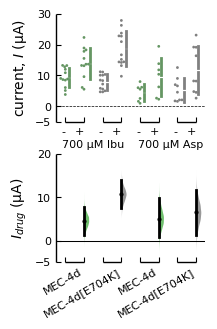

In [11]:
#plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group300.mean_diff.plot(fig_size=(2.3, 3.5), swarm_ylim=(-5,30), contrast_ylim=(-5,20), raw_marker_size=(2),es_marker_size=2,contrast_label='$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='current, $\it{I}$ (µA)',custom_palette=colorsESTchange, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['-','+','-','+','-','+','-','+',]

fig1.axes[0].set_xticklabels(labels,  ha='right')#rotation=30,
fig1.axes[0].text(-0.2, -13.5, '700 µM Ibu',fontsize= AxisLegendSize)
fig1.axes[0].text(3.9, -13.5, '700 µM Asp',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
#fig1.axes[0].spines['left'].set_position(('outward',10)) 
fig1.axes[1].set_yticks([-5,0,10,20])
fig1.axes[0].set_yticks([-5,0,10,20,30])



labels2 = ['','MEC-4d','','MEC-4d[E704K]','','MEC-4d','','MEC-4d[E704K]']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right', fontsize= AxisLegendSize)

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig6-ChangeInCurrent"+'.pdf')

# plot data R und S Enantiomer

In [12]:
EnantiomerRIbu = dfALL[(dfALL.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (dfALL.TestSol.isin(["NaGluRIbuR30"]))] 
EnantiomerSIbu = dfALL[(dfALL.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (dfALL.TestSol.isin(["NaGluSIbuS30"]))] 


In [13]:
#### Ibu

mg419BeforeRIbu = EnantiomerRIbu.loc[EnantiomerRIbu['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
mg419BeforeRIbu.columns = ['M4d-RIbu']

mg419BeforeSIbu = EnantiomerSIbu.loc[EnantiomerSIbu['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
mg419BeforeSIbu.columns = ['M4d-SIbu']


uninjBeforeRIbu = EnantiomerRIbu.loc[EnantiomerRIbu['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
uninjBeforeRIbu.columns = ['uninj-RIbu']

uninjBeforeSIbu = EnantiomerSIbu.loc[EnantiomerSIbu['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
uninjBeforeSIbu.columns = ['uninj-SIbu']


ChangeConcatRandSIbu = pd.concat([mg419BeforeRIbu.reset_index(drop=True),mg419BeforeSIbu.reset_index(drop=True),uninjBeforeRIbu.reset_index(drop=True),uninjBeforeSIbu.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
ChangeConcatRandSIbuuA = ChangeConcatRandSIbu.astype(float)*1000000*-1


#load Data
#shared_controlI300Concat = dabest.load(I300ConcatuA,idx=("Uij-Amil", "D-Amil")
#shared_control = dabest.load(I300ConcatuA, idx=("Uij-Amil","D-Amil","Uij-Bmil","D-Bmil",'Uij-Ibu','D-Ibu'))
                                                           
#shared_controltest = dabest.load(I300ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Ibu", "D-Ibu")))
#multi_2group300 = dabest.load(ChangeConcatuA, idx=(("Current-ZeroIbu-mg419", "Current-700Ibu-mg419",), ("Current-ZeroIbu-mg602", "Current-700Ibu-mg602")))


#multi_2group300 = dabest.load(ChangeConcatuA, idx=(("Current-ZeroIbu-mg419", "Current-700Ibu-mg419",), ("Current-ZeroIbu-mg602", "Current-700Ibu-mg602",),("Current-ZeroAsp-mg419", "Current-700Asp-mg419",), ("Current-ZeroAsp-mg602", "Current-700Asp-mg602",)))

 # #load Data
shared_control_EnantM4d = dabest.load(ChangeConcatRandSIbuuA , idx=(('uninj-RIbu','M4d-RIbu',),('uninj-SIbu','M4d-SIbu',))) 
shared_control_EnantM4d                        


DABEST v0.2.4
             
Good afternoon!
The current time is Fri Dec 18 17:41:03 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. M4d-RIbu minus uninj-RIbu
2. M4d-SIbu minus uninj-SIbu

5000 resamples will be used to generate the effect size bootstraps.

In [14]:
shared_control_EnantM4d.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Fri Dec 18 17:41:03 2020.

The unpaired mean difference between uninj-RIbu and M4d-RIbu is 5.27 [95%CI 3.49, 8.62].
The two-sided p-value of the Mann-Whitney test is 0.000197.

The unpaired mean difference between uninj-SIbu and M4d-SIbu is 4.7 [95%CI 3.39, 5.91].
The two-sided p-value of the Mann-Whitney test is 0.00028.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

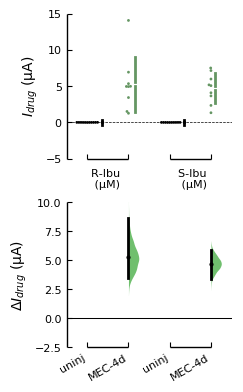

In [15]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#plt.figure(figsize=(3, 4)) 
colorsESTDT1=[(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_control_EnantM4d.mean_diff.plot( swarm_ylim=(-5,15), contrast_ylim=(-2.5,10), custom_palette=colorsESTDT1,fig_size=(3, 4.7),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000',  linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)
labels2 = ['uninj','MEC-4d','uninj','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
fig1.axes[0].text(0.1, -9.0, 'R-Ibu \n (µM)',fontsize= AxisLegendSize)
fig1.axes[0].text(2.2, -9, 'S-Ibu \n (µM)',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
#fig1.axes[0].spines['left'].set_position(('outward',10)) 
/


plt.gcf().subplots_adjust(bottom=0.17, left=0.35,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-IDT1Uninj"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-Enant"+'.pdf')




# FIND ORIGINAL TRACES FOR IBUPROFEN AND ASPIRIN OR MUTANT?

### HARDCODING THE IMPORT HEKA PATH

In [16]:
# Add heka_reader to PYTHONPATH
import sys
#fpath = '/Users/Fechner/PythonStuff/heka_reader' #initial version delete
fpath = '/Users/Fechner/Dropbox/PythonImport/heka_reader' #MAC
sys.path.append(fpath)
import heka_reader

### got the heka reader from here
https://github.com/campagnola/heka_reader

- clone the repository to your computer (move to directory with terminal commands. Mine here is called PythonStuff at the moment: change name)
    - git clone https://github.com/campagnola/heka_reader.git
- the heka reader enables to read and access the .dat files (to work in jupyter notebook, you habe to append the heka_reader to the path where the heka reader is stored)
- browser.py enables to easily browse for recordings within a .dat comparable to Igor or other similar programs
- I changed the following in my local browser.py version, because the functions output was a tuple:
    - def load_clicked():
    - Display a file dialog to select a .dat file
    - file_name = pg.QtGui.QFileDialog.getOpenFileName()
    - if isinstance(file_name, tuple):   (ADDED THIS LINE)
        -    file_name = file_name[0]    (ADDED THIS LINE)
    - if file_name == '':
        -    return
    - load(file_name)

## examples of how to access data structure

    # Select a trace
    trace = bundle.pul[group_ind][series_ind][sweep_ind][trace_ind]
    
    # Print meta-data for this trace
    print(trace)
    
    # Load data for this trace
    data = bundle.data[group_id, series_id, sweep_ind, trace_ind]

# CHANGE DIRECTORY

In [17]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX


In [18]:
####### Hardcoding the data path to your device ####
Changefiledir ='/Users/Fechner/Box Sync/Fechner/'

#### doesn't need to be changed for TEVC analysis ###
filedirMeta = Changefiledir + 'TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'
#filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename
print(filedirMeta)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/


### define recording number and group number

In [19]:
####### hardcoding ########## FOR NaGLu FIgure 1 ######
#enter here different IDs

Ibumg419frog = 'STFX057'
Ibumg419RecNr = '005' 
Ibumg419Group = 2-1  #Group Number, -1 for python convention

Ibumg602frog = 'STFX054'
Ibumg602RecNr = '009' 
Ibumg602Group = 6-1

Aspmg419frog = 'STFX087'
Aspmg419RecNr = '021' 
Aspmg419Group = 2-1  #Group Number, -1 for python convention

## Find filenames of recordings

In [20]:
Ibumg419filename = 'MetaSTFX057SensitivityMetadataSTFXIBU.xlsx'
#Ibumg419Recording = Ibumg419frog + Ibumg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
Ibumg419xl = pd.ExcelFile(filedirMeta+Ibumg419filename)#converters={'names':str,'ages':str}
Ibumg419xl.sheet_names
Ibumg419df = Ibumg419xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
Ibumg419Recording = Ibumg419frog + Ibumg419RecNr


In [21]:
Ibumg602filename = 'MetaSTFX054SensitivityMetadataSTFXIBU.xlsx'
#Ibumg602Recording = Ibumg602frog + Ibumg602RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
Ibumg602xl = pd.ExcelFile(filedirMeta+Ibumg602filename)#converters={'names':str,'ages':str}
Ibumg602xl.sheet_names
Ibumg602df = Ibumg602xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
Ibumg602Recording = Ibumg602frog + Ibumg602RecNr


In [22]:
Aspmg419filename = 'MetaSTFX087SensitivityMetadataSTFXASP.xlsx'
#Aspmg419Recording = Aspmg419frog + Aspmg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
Aspmg419xl = pd.ExcelFile(filedirMeta+Aspmg419filename)#converters={'names':str,'ages':str}
Aspmg419xl.sheet_names
Aspmg419df = Aspmg419xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
Aspmg419Recording = Aspmg419frog + Aspmg419RecNr


## find filename on meta data sheet

In [23]:
#find the .dat file name in the MetaData sheet of the corresponding recording
Ibumg419DatFile = Ibumg419df.Filename[(Ibumg419df.CellID == Ibumg419Recording)]

In [24]:
Ibumg602DatFile = Ibumg602df.Filename[(Ibumg602df.CellID == Ibumg602Recording)]

In [25]:
Aspmg419DatFile = Aspmg419df.Filename[(Aspmg419df.CellID == Aspmg419Recording)]

## load dat files

In [26]:
# Load a .dat file
Ibumg419loadFile = heka_reader.Bundle(str(Ibumg419DatFile.iloc[0])+'.dat')

In [27]:
Ibumg602loadFile = heka_reader.Bundle(str(Ibumg602DatFile.iloc[0])+'.dat')

In [28]:
Aspmg419loadFile = heka_reader.Bundle(str(Aspmg419DatFile.iloc[0])+'.dat')

## MEC-4d Ibuprofen

In [29]:
Ibumg419Before1 = []
for i in range(0,8):#(0,len(tt)):
    Ibumg419Before1.append(Ibumg419loadFile.data[Ibumg419Group,1,i,0])
    
Ibumg419Before2 = []
for j in range(0,8):#(0,len(tt)):
    Ibumg419Before2.append(Ibumg419loadFile.data[Ibumg419Group,2,j,0])
    
Ibumg419Before3 = []
for k in range(0,8):#(0,len(tt)):
    Ibumg419Before3.append(Ibumg419loadFile.data[Ibumg419Group,3,k,0])

In [30]:
Ibumg419Ibu1 = []
for i in range(0,8):#(0,len(tt)):
    Ibumg419Ibu1.append(Ibumg419loadFile.data[Ibumg419Group,29,i,0])
    
Ibumg419Ibu2 = []
for j in range(0,8):#(0,len(tt)):
    Ibumg419Ibu2.append(Ibumg419loadFile.data[Ibumg419Group,30,j,0])
    
Ibumg419Ibu3 = []
for k in range(0,8):#(0,len(tt)):
    Ibumg419Ibu3.append(Ibumg419loadFile.data[Ibumg419Group,31,k,0])

## MEC-4d E704K

In [31]:
Ibumg602Before1 = []
for i in range(0,8):#(0,len(tt)):
    Ibumg602Before1.append(Ibumg602loadFile.data[Ibumg602Group,1,i,0])
    
Ibumg602Before2 = []
for j in range(0,8):#(0,len(tt)):
    Ibumg602Before2.append(Ibumg602loadFile.data[Ibumg602Group,2,j,0])
    
Ibumg602Before3 = []
for k in range(0,8):#(0,len(tt)):
    Ibumg602Before3.append(Ibumg602loadFile.data[Ibumg602Group,3,k,0])

In [32]:
Ibumg602Ibu1 = []
for i in range(0,8):#(0,len(tt)):
    Ibumg602Ibu1.append(Ibumg602loadFile.data[Ibumg602Group,29,i,0])
    
Ibumg602Ibu2 = []
for j in range(0,8):#(0,len(tt)):
    Ibumg602Ibu2.append(Ibumg602loadFile.data[Ibumg602Group,30,j,0])
    
Ibumg602Ibu3 = []
for k in range(0,8):#(0,len(tt)):
    Ibumg602Ibu3.append(Ibumg602loadFile.data[Ibumg602Group,31,k,0])

# mg419 Aspirin 

In [33]:
Aspmg419Before1 = []
for i in range(0,8):#(0,len(tt)):
    Aspmg419Before1.append(Aspmg419loadFile.data[Aspmg419Group,3-1,i,0])
    
Aspmg419Before2 = []
for j in range(0,8):#(0,len(tt)):
    Aspmg419Before2.append(Aspmg419loadFile.data[Aspmg419Group,4-1,j,0])
    
Aspmg419Before3 = []
for k in range(0,8):#(0,len(tt)):
    Aspmg419Before3.append(Aspmg419loadFile.data[Aspmg419Group,5-1,k,0])

In [34]:
Aspmg419Asp1 = []
for i in range(0,8):#(0,len(tt)):
    Aspmg419Asp1.append(Aspmg419loadFile.data[Aspmg419Group,31-1,i,0])
    
Aspmg419Asp2 = []
for j in range(0,8):#(0,len(tt)):
    Aspmg419Asp2.append(Aspmg419loadFile.data[Aspmg419Group,32-1,j,0])
    
Aspmg419Asp3 = []
for k in range(0,8):#(0,len(tt)):
    Aspmg419Asp3.append(Aspmg419loadFile.data[Aspmg419Group,33-1,k,0])

## Average

In [35]:
Ibumg419BeforeMEAN =[]
for i in range(0,8):
    Ibumg419BeforeMEAN.append(((Ibumg419Before1[i]+Ibumg419Before2[i]+Ibumg419Before3[i])/3)*1000000)
    
Ibumg419IbuMEAN =[]
for j in range(0,8):
    Ibumg419IbuMEAN.append(((Ibumg419Ibu1[j]+Ibumg419Ibu2[j]+Ibumg419Ibu3[j])/3)*1000000)

In [36]:
Ibumg602BeforeMEAN =[]
for i in range(0,8):
    Ibumg602BeforeMEAN.append(((Ibumg602Before1[i]+Ibumg602Before2[i]+Ibumg602Before3[i])/3)*1000000)
    
Ibumg602IbuMEAN =[]
for j in range(0,8):
    Ibumg602IbuMEAN.append(((Ibumg602Ibu1[j]+Ibumg602Ibu2[j]+Ibumg602Ibu3[j])/3)*1000000)

In [37]:
Aspmg419BeforeMEAN =[]
for i in range(0,8):
    Aspmg419BeforeMEAN.append(((Aspmg419Before1[i]+Aspmg419Before2[i]+Aspmg419Before3[i])/3)*1000000)
    
Aspmg419AspMEAN =[]
for j in range(0,8):
    Aspmg419AspMEAN.append(((Aspmg419Asp1[j]+Aspmg419Asp2[j]+Aspmg419Asp3[j])/3)*1000000)

In [38]:
Aspmg419AspMEAN

[array([-9.4546875 , -9.45572917, -9.45208333, ..., -8.97447917,
        -8.9796875 , -8.99583333]),
 array([-9.33333333, -9.29895833, -9.3171875 , ..., -9.15729167,
        -9.134375  , -9.14583333]),
 array([-9.31927083, -9.30625   , -9.3234375 , ..., -9.33802083,
        -9.35364583, -9.34583333]),
 array([-9.35260417, -9.346875  , -9.37760417, ..., -9.5515625 ,
        -9.5234375 , -9.525     ]),
 array([-9.40052083, -9.38541667, -9.38072917, ..., -9.71510417,
        -9.7203125 , -9.72916667]),
 array([-9.36822917, -9.39479167, -9.375     , ..., -9.83489583,
        -9.80104167, -9.70729167]),
 array([ -9.37395833,  -9.36770833,  -9.3921875 , ..., -10.0765625 ,
        -10.02552083, -10.059375  ]),
 array([ -9.36927083,  -9.384375  ,  -9.38333333, ..., -10.15729167,
        -10.13854167, -10.13958333])]

# Make FIgure 6

In [39]:
colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00)]

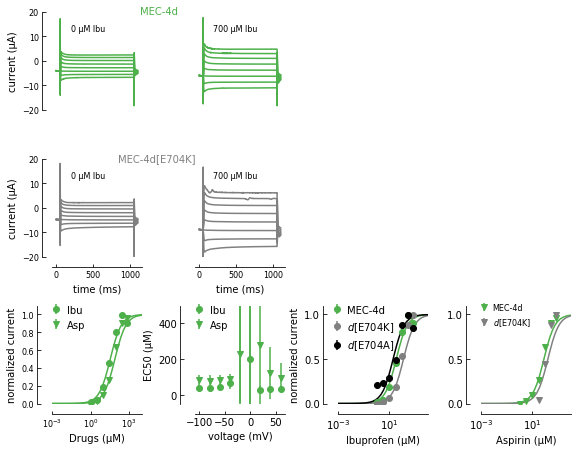

In [40]:
#Plot1
fig = plt.figure(figsize=(9, 8)) 

ax1 = plt.subplot(3,4,1)
for m in range(0,8):
    plt.plot(Ibumg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0])#
    
ax2 = plt.subplot(3,4,2)
for n in range(0,8):
    plt.plot(Ibumg419IbuMEAN[n][300:1400], color = colorsSINGLES[0])
    
ax3 = plt.subplot(3,4,5)
for i in range(0,8):
    plt.plot(Ibumg602BeforeMEAN[i][300:1400], 'grey')
    
ax4 = plt.subplot(3,4,6)
for j in range(0,8):
    plt.plot(Ibumg602IbuMEAN[j][300:1400], 'grey')

ax5 = plt.subplot(3,4,9)
plt.xscale('log')

ax6 = plt.subplot(3,4,10)

ax7 = plt.subplot(3,4,11)
plt.xscale('log')

ax8 = plt.subplot(3,4,12)
plt.xscale('log')


###### changes in appearance

ax1.set_ylim([-20, 20])
ax1.text(200, 12, '0 µM Ibu',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  

ax1.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax1.set_ylabel('current (µA)',fontsize=AxisLabelSize)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)

##### ax2
ax2.set_ylim([-20, 20])
ax2.text(180, 12,  '700 µM Ibu',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax2.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax2.set_ylabel('current (µA)',fontsize=AxisLabelSize)
ax2.spines['bottom'].set_visible(False) 
ax2.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.yaxis.set_visible(False)
ax2.text(-800, 19, 'MEC-4d',color=colorsSINGLES[0],fontsize=AxisLabelSize)

##### ax3
ax3.set_ylim([-20, 20])
ax3.text(200, 12, '0 µM Ibu',fontsize=AxisLegendSize)
#ax1.set_xlim([300, 1400])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax3.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax3.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax3.spines['bottom'].set_visible(False) 
#ax3.xaxis.set_visible(False)

##### ax2
ax4.set_ylim([-20, 20])
ax4.text(180, 12,  '700 µM Ibu',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax4.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax4.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax4.spines['bottom'].set_visible(False) 
#ax4.xaxis.set_visible(False)
ax4.spines['left'].set_visible(False) 
ax4.yaxis.set_visible(False)
ax4.text(-1100, 19, 'MEC-4d[E704K]',color='grey',fontsize=AxisLabelSize)



## add Km plot 
#### 
ax6.errorbar(KmIbu['Voltages'],KmIbu['mg419-Mean-Km-Ibu'], yerr=KmIbu['mg419-SD-Km-Ibu'],fmt='o', color = colorsSINGLES[0], label= 'Ibu')
ax6.errorbar(KmAsp['Voltages'],KmAsp['mg419-Mean-Km-Asp'], yerr=KmAsp['mg419-SD-Km-Asp'],fmt='v', color = colorsSINGLES[0], label= 'Asp')
#ax6.errorbar(KmDiclo['Voltages'],KmDiclo['mg419-Mean-Km-Diclo'], yerr=KmDiclo['mg419-SD-Km-Diclo'], fmt='o', color = 'magenta')
#ax3.errorbar(KmIbu['Voltages'][0:3],KmIbu['mg419-Mean-Km-Ibu'][0:3], yerr=KmIbu['mg419-SD-Km-Ibu'][0:3], fmt='o', color = 'black')
#ax3.errorbar(KmIbu['Voltages'][5:9],KmIbu['mg419-Mean-Km-Ibu'][5:9], yerr=KmIbu['mg419-SD-Km-Ibu'][5:9], fmt='o', color = 'black')
#ax3.set_xlim([0.0000001, 10000])
ax6.set_ylim([-50,500])
#spines
ax6.spines['right'].set_visible(False)                                 
ax6.spines['top'].set_visible(False)
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax6.set_ylabel('EC50 (µM)',fontsize=AxisLabelSize)
ax6.set_xticks([-100,-50,0, 50])
ax6.legend()
ax6.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.15, 1.10),handletextpad=0.05)

#add Data and error bars
ax5.errorbar(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], yerr=mg419_Ibu_Min100['SEM-mg419-Ibu-Min100'], fmt='o', color = colorsSINGLES[0], label= 'Ibu')
ax5.errorbar(mg419_Asp_Min100['concMicroMolar'],mg419_Asp_Min100['Avg-mg419-Asp-Min100'], yerr=mg419_Asp_Min100['SEM-mg419-Asp-Min100'], fmt='v', color = colorsSINGLES[0], label= 'Asp')
#ax5.errorbar(mg419_Diclo_Min100['concMicroMolar'],mg419_Diclo_Min100['Avg-mg419-Diclo-Min100'], yerr=mg419_Diclo_Min100['SEM-mg419-Diclo-Min100'], fmt='o', color = 'magenta')
#plt.scatter(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], color = 'black')

ax5.set_xlim([0.001, 10000])
ax5.set_ylim([0, 1.1])
#spines
ax5.spines['right'].set_visible(False)                                 
ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax5.set_xlabel('Drugs (µM)',fontsize=AxisLabelSize)
ax5.set_ylabel('normalized current',fontsize=AxisLabelSize)
ax5.legend()
ax5.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.15, 1.10),handletextpad=0.05)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
#ax5.set_title("add legend drugs")
#a21.set_title('bla',size=18)
#ax2.set_xticklabels(["VOltages"],rotation=30)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
#add x and y labels
#plt.ylabel('Reversal Potential (mV)', fontsize=14) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=14)


####
ax7.errorbar(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], yerr=mg419_Ibu_Min100['SEM-mg419-Ibu-Min100'], fmt='o', color = colorsSINGLES[0], label= 'MEC-4d')#
ax7.errorbar(mg602_Ibu_Min100['concMicroMolar'],mg602_Ibu_Min100['Avg-mg602-Ibu-Min100'], yerr=mg602_Ibu_Min100['SEM-mg602-Ibu-Min100'], fmt='o', color = 'grey', label= '$\it{d}$[E704K]')
ax7.errorbar(mg687_Ibu_Min100['concMicroMolar'],mg687_Ibu_Min100['Avg-mg687-Ibu-Min100'], yerr=mg687_Ibu_Min100['SEM-mg687-Ibu-Min100'], fmt='o', color = 'black',label= '$\it{d}$[E704A]')

ax7.set_xlim([0.001, 10000])
ax7.set_ylim([0, 1.1])
#spines
ax7.spines['right'].set_visible(False)                                 
ax7.spines['top'].set_visible(False)
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.set_xlabel('Ibuprofen (µM)',fontsize=AxisLabelSize)
ax7.set_ylabel('normalized current',fontsize=AxisLabelSize)
#ax7.set_title("add legend mutants")
ax7.legend()
ax7.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.25, 1.10),handletextpad=0.05)


#### plot 5
ax8.errorbar(mg419_Asp_Min100['concMicroMolar'],mg419_Asp_Min100['Avg-mg419-Asp-Min100'], yerr=mg419_Asp_Min100['SEM-mg419-Asp-Min100'], fmt='v',color = colorsSINGLES[0], label= 'MEC-4d')
ax8.errorbar(mg602_Asp_Min100['concMicroMolar'],mg602_Asp_Min100['Avg-mg602-Asp-Min100'], yerr=mg602_Asp_Min100['SEM-mg602-Asp-Min100'], fmt='v', color = 'grey', label= '$\it{d}$[E704K]')


ax8.set_xlim([0.001, 10000])
ax8.set_ylim([0, 1.1])
#spines
ax8.spines['right'].set_visible(False)                                 
ax8.spines['top'].set_visible(False)
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.set_xlabel('Aspirin (µM)',fontsize=AxisLabelSize)
#ax8.set_ylabel('I norm (I/Imax)',fontsize=AxisLabelSize)
ax8.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.25, 1.10),handletextpad=0.05,fontsize=AxisLegendSize)
#### plot 6
#ax8.spines['left'].set_visible(False) 
#ax8.yaxis.set_visible(False)
#ax8.set_ylabel
#ax6.errorbar(mg419_Diclo_Min100['concMicroMolar'],mg419_Diclo_Min100['Avg-mg419-Diclo-Min100'], yerr=mg419_Diclo_Min100['SEM-mg419-Diclo-Min100'], fmt='o', color = 'magenta')
#ax6.errorbar(mg602_Diclo_Min100['concMicroMolar'],mg602_Diclo_Min100['Avg-mg602-Diclo-Min100'], yerr=mg602_Diclo_Min100['SEM-mg602-Diclo-Min100'], fmt='v', color = 'magenta')

# ax6.set_xlim([0.001, 10000])
# ax6.set_ylim([0, 1.1])
# #ax1.set_ylim([0.2, 0.3])
# #spines
# ax6.spines['right'].set_visible(False)                                 
# ax6.spines['top'].set_visible(False)
# ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax6.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
# ax6.spines['bottom'].set_position(('outward',10))  
# ax6.spines['top'].set_position(('axes',5)) 
# ax6.get_yaxis().set_tick_params(direction='in')
# ax6.get_xaxis().set_tick_params(direction='in')
# ax6.set_xlabel('Diclofenac (µM, log)',fontsize=12)
# ax6.set_ylabel('I norm (I/Imax)',fontsize=12)

#plt.gcf().subplots_adjust(bottom=0.3, left=0.1,hspace=0.5, wspace=0.6) 



###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

xModel = np.logspace(-6, 4) #same for all

#### Mean Hill values calulated at -100 mV
MeanHillmg419Ibu = np.array([1,  1, KmIbu['mg419-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg419Ibu = Hill(xModel, *MeanHillmg419Ibu) #use fittedParameters or initialParameters(or others preciously calculated)
#### 
MeanHillmg602Ibu = np.array([1,  1, KmIbu['mg602-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg602Ibu = Hill(xModel, *MeanHillmg602Ibu) 
#### 
MeanHillmg687Ibu = np.array([1,  1, 1.95E+01]) # [n,Imax,Km]
y_mg687Ibu = Hill(xModel, *MeanHillmg687Ibu) 

#### ASPIRIN #### 
MeanHillmg419Asp = np.array([1,  1, KmAsp['mg419-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg419Asp = Hill(xModel, *MeanHillmg419Asp) 
###mg602
MeanHillmg602Asp = np.array([1,  1, KmAsp['mg602-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg602Asp = Hill(xModel, *MeanHillmg602Asp) 

# #### Diclofenac#### 
# MeanHillmg419Diclo = np.array([1,  1, KmDiclo['mg419-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg419Diclo = Hill(xModel, *MeanHillmg419Diclo) 
# #### mg602
# MeanHillmg602Diclo = np.array([1,  1, KmDiclo['mg602-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg602Diclo = Hill(xModel, *MeanHillmg602Diclo) 

ax5.plot(xModel, y_mg419Ibu, color = colorsSINGLES[0])
ax5.plot(xModel, y_mg419Asp, color = colorsSINGLES[0])
#ax5.plot(xModel, y_mg419Diclo, "magenta")

### Individual curves
ax7.plot(xModel, y_mg419Ibu, color = colorsSINGLES[0])
ax7.plot(xModel, y_mg602Ibu,'grey')#,linestyle='--'
ax7.plot(xModel, y_mg687Ibu,'black')#,linestyle=':'

ax8.plot(xModel, y_mg419Asp, color = colorsSINGLES[0])
ax8.plot(xModel, y_mg602Asp, "grey")

#ax6.plot(xModel, y_mg419Diclo, "magenta")
#ax6.plot(xModel, y_mg602Diclo, "magenta",linestyle='--')
plt.gcf().subplots_adjust(bottom=0.2, left=0.1,hspace=0.5, wspace=0.6) 

#plt.savefig(filedirManuscript+"Fig6-DoseResponse"+'.pdf')


# MAKE FIGURE 6 - VERSION 2

## Traces

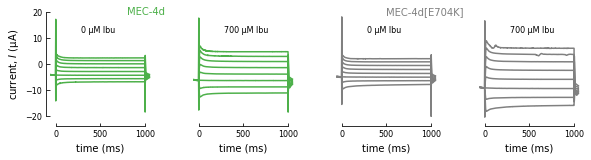

In [152]:
#Plot1
fig = plt.figure(figsize=(9, 2.5)) 

ax1 = plt.subplot(1,4,1)
for m in range(0,8):
    plt.plot(ModTime,Ibumg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0],clip_on=False)#
    
ax2 = plt.subplot(1,4,2)
for n in range(0,8):
    plt.plot(ModTime,Ibumg419IbuMEAN[n][300:1400], color = colorsSINGLES[0],clip_on=False)
    
ax3 = plt.subplot(1,4,3)
for i in range(0,8):
    plt.plot(ModTime,Ibumg602BeforeMEAN[i][300:1400], 'grey',clip_on=False)
    
ax4 = plt.subplot(1,4,4)
for j in range(0,8):
    plt.plot(ModTime,Ibumg602IbuMEAN[j][300:1400], 'grey',clip_on=False)


###### changes in appearance

ax1.set_ylim([-20, 20])
ax1.set_xlim([0, 1000])
ax1.text(280, 12, '0 µM Ibu',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax1.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax1.set_ylabel('current, $\it{I}$ (µA)',fontsize=AxisLabelSize)
#ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
ax1.set_xlabel('time (ms)',fontsize=AxisLabelSize)

##### ax2
ax2.set_ylim([-20, 20])
ax2.set_xlim([0, 1000])
ax2.text(280, 12,  '700 µM Ibu',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax2.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax2.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.yaxis.set_visible(False)
ax2.text(-800, 19, 'MEC-4d',color=colorsSINGLES[0],fontsize=AxisLabelSize)
ax2.set_xlabel('time (ms)',fontsize=AxisLabelSize)

##### ax3
ax3.set_ylim([-20, 20])
ax3.set_xlim([0, 1000])
ax3.text(280, 12, '0 µM Ibu',fontsize=AxisLegendSize)
#ax1.set_xlim([300, 1400])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax3.set_xlabel('time (ms)',fontsize=AxisLabelSize)
#ax3.set_ylabel('I (µA)',fontsize=12)
ax3.spines['left'].set_visible(False) 
ax3.yaxis.set_visible(False)

##### ax2
ax4.set_ylim([-20, 20])
ax4.set_xlim([0, 1000])
ax4.text(280, 12,  '700 µM Ibu',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax4.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax4.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax4.spines['bottom'].set_visible(False) 
#ax4.xaxis.set_visible(False)
ax4.spines['left'].set_visible(False) 
ax4.yaxis.set_visible(False)
ax4.text(-1100, 19, 'MEC-4d[E704K]',color='grey',fontsize=AxisLabelSize)


plt.gcf().subplots_adjust(bottom=0.3, left=0.1,hspace=0.5, wspace=0.6) 

plt.savefig(filedirManuscript+"Fig6-DoseResponseTRACES"+'.pdf')


# original traces MEC-4 d Asp. same style as EIPA figure

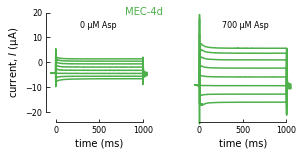

In [154]:


#Plot1

#DEGT-1D
fig = plt.figure(figsize=(9, 2.2)) 

ax1 = plt.subplot(1,4,1)
for m in range(0,8):
    plt.plot(ModTime,Aspmg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0],clip_on=False)
    
ax2 = plt.subplot(1,4,2)
for n in range(0,8):
    plt.plot(ModTime,Aspmg419AspMEAN[n][300:1400], color = colorsSINGLES[0],clip_on=False)
    
# ax3 = plt.subplot(1,4,3)
# plt.xscale('log')
# ax4 = plt.subplot(1,4,4)




##############
ax1.set_ylim([-20, 20])
ax1.set_xlim([0, 1000])
ax1.text(280, 14, '0 µM Asp',fontsize=AxisLegendSize)#numbers are the values on the axes
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  

ax1.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax1.set_ylabel('current, $\it{I}$ (µA)',fontsize=AxisLabelSize)
#ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)

##### ax2
ax2.set_ylim([-20, 20])
ax2.set_xlim([0, 1000])
ax2.text(260, 14,  '700 µM Asp',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax2.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax2.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.yaxis.set_visible(False)
ax2.text(-850, 19, 'MEC-4d',color=colorsSINGLES[0],fontsize=AxisLabelSize)



plt.gcf().subplots_adjust(bottom=0.25, left=0.1,hspace=0.6, wspace=0.65) 



plt.savefig(filedirManuscript+"Fig4-M4-OriginalTracesAsp"+'.pdf')


## PANEL A

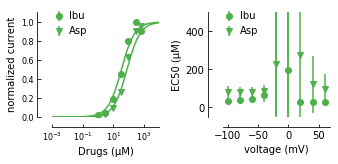

In [43]:
#Plot1
fig = plt.figure(figsize=(5.5, 2.5)) 

# ax1 = plt.subplot(3,4,1)
# for m in range(0,8):
#     plt.plot(Ibumg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0])#
    
# ax2 = plt.subplot(3,4,2)
# for n in range(0,8):
#     plt.plot(Ibumg419IbuMEAN[n][300:1400], color = colorsSINGLES[0])
    
# ax3 = plt.subplot(3,4,5)
# for i in range(0,8):
#     plt.plot(Ibumg602BeforeMEAN[i][300:1400], 'grey')
    
# ax4 = plt.subplot(3,4,6)
# for j in range(0,8):
#     plt.plot(Ibumg602IbuMEAN[j][300:1400], 'grey')

ax5 = plt.subplot(1,2,1)
plt.xscale('log')

ax6 = plt.subplot(1,2,2)








## add Km plot 
#### 
ax6.errorbar(KmIbu['Voltages'],KmIbu['mg419-Mean-Km-Ibu'], yerr=KmIbu['mg419-SD-Km-Ibu'],fmt='o', color = colorsSINGLES[0], label= 'Ibu')
ax6.errorbar(KmAsp['Voltages'],KmAsp['mg419-Mean-Km-Asp'], yerr=KmAsp['mg419-SD-Km-Asp'],fmt='v', color = colorsSINGLES[0], label= 'Asp')
#ax6.errorbar(KmDiclo['Voltages'],KmDiclo['mg419-Mean-Km-Diclo'], yerr=KmDiclo['mg419-SD-Km-Diclo'], fmt='o', color = 'magenta')
#ax3.errorbar(KmIbu['Voltages'][0:3],KmIbu['mg419-Mean-Km-Ibu'][0:3], yerr=KmIbu['mg419-SD-Km-Ibu'][0:3], fmt='o', color = 'black')
#ax3.errorbar(KmIbu['Voltages'][5:9],KmIbu['mg419-Mean-Km-Ibu'][5:9], yerr=KmIbu['mg419-SD-Km-Ibu'][5:9], fmt='o', color = 'black')
#ax3.set_xlim([0.0000001, 10000])
ax6.set_ylim([-50,500])
#spines
ax6.spines['right'].set_visible(False)                                 
ax6.spines['top'].set_visible(False)
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax6.set_ylabel('EC50 (µM)',fontsize=AxisLabelSize)
ax6.set_xticks([-100,-50,0, 50])
ax6.legend()
ax6.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.15, 1.10),handletextpad=0.05)

#add Data and error bars
ax5.errorbar(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], yerr=mg419_Ibu_Min100['SEM-mg419-Ibu-Min100'], fmt='o', color = colorsSINGLES[0], label= 'Ibu')
ax5.errorbar(mg419_Asp_Min100['concMicroMolar'],mg419_Asp_Min100['Avg-mg419-Asp-Min100'], yerr=mg419_Asp_Min100['SEM-mg419-Asp-Min100'], fmt='v', color = colorsSINGLES[0], label= 'Asp')
#ax5.errorbar(mg419_Diclo_Min100['concMicroMolar'],mg419_Diclo_Min100['Avg-mg419-Diclo-Min100'], yerr=mg419_Diclo_Min100['SEM-mg419-Diclo-Min100'], fmt='o', color = 'magenta')
#plt.scatter(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], color = 'black')

ax5.set_xlim([0.001, 10000])
ax5.set_ylim([0, 1.1])
#spines
ax5.spines['right'].set_visible(False)                                 
ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax5.set_xlabel('Drugs (µM)',fontsize=AxisLabelSize)
ax5.set_ylabel('normalized current',fontsize=AxisLabelSize)
ax5.legend()
ax5.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.15, 1.10),handletextpad=0.05)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
#ax5.set_title("add legend drugs")
#a21.set_title('bla',size=18)
#ax2.set_xticklabels(["VOltages"],rotation=30)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
#add x and y labels
#plt.ylabel('Reversal Potential (mV)', fontsize=14) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=14)



###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

xModel = np.logspace(-6, 4) #same for all

#### Mean Hill values calulated at -100 mV
MeanHillmg419Ibu = np.array([1,  1, KmIbu['mg419-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg419Ibu = Hill(xModel, *MeanHillmg419Ibu) #use fittedParameters or initialParameters(or others preciously calculated)
#### 
MeanHillmg602Ibu = np.array([1,  1, KmIbu['mg602-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg602Ibu = Hill(xModel, *MeanHillmg602Ibu) 
#### 
MeanHillmg687Ibu = np.array([1,  1, 1.95E+01]) # [n,Imax,Km]
y_mg687Ibu = Hill(xModel, *MeanHillmg687Ibu) 

#### ASPIRIN #### 
MeanHillmg419Asp = np.array([1,  1, KmAsp['mg419-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg419Asp = Hill(xModel, *MeanHillmg419Asp) 
###mg602
MeanHillmg602Asp = np.array([1,  1, KmAsp['mg602-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg602Asp = Hill(xModel, *MeanHillmg602Asp) 

# #### Diclofenac#### 
# MeanHillmg419Diclo = np.array([1,  1, KmDiclo['mg419-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg419Diclo = Hill(xModel, *MeanHillmg419Diclo) 
# #### mg602
# MeanHillmg602Diclo = np.array([1,  1, KmDiclo['mg602-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg602Diclo = Hill(xModel, *MeanHillmg602Diclo) 

ax5.plot(xModel, y_mg419Ibu, color = colorsSINGLES[0])
ax5.plot(xModel, y_mg419Asp, color = colorsSINGLES[0])
#ax5.plot(xModel, y_mg419Diclo, "magenta")



#ax6.plot(xModel, y_mg419Diclo, "magenta")
#ax6.plot(xModel, y_mg602Diclo, "magenta",linestyle='--')
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.5, wspace=0.6) 

plt.savefig(filedirManuscript+"Fig6-DoseResponseIBU-ASP"+'.pdf')


# combined Asp dose response original trace and K values

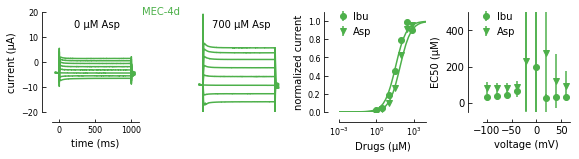

In [44]:

fig = plt.figure(figsize=(9, 2.2)) 

ax1 = plt.subplot(1,4,1)
for m in range(0,8):
    plt.plot(ModTime,Aspmg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0])
    
ax2 = plt.subplot(1,4,2)
for n in range(0,8):
    plt.plot(ModTime,Aspmg419AspMEAN[n][300:1400], color = colorsSINGLES[0])
    

ax5 = plt.subplot(1,4,3)
plt.xscale('log')
ax6 = plt.subplot(1,4,4)






##############
ax1.set_ylim([-20, 20])
ax1.text(200, 14, '0 µM Asp')#numbers are the values on the axes
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  

ax1.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax1.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)

##### ax2
ax2.set_ylim([-20, 20])
ax2.text(120, 14,  '700 µM Asp')
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax2.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax2.set_ylabel('current (µA)',fontsize=AxisLabelSize)
ax2.spines['bottom'].set_visible(False) 
ax2.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.yaxis.set_visible(False)
ax2.text(-850, 19, 'MEC-4d',color=colorsSINGLES[0],fontsize=AxisLabelSize)





## add Km plot 
#### 
ax6.errorbar(KmIbu['Voltages'],KmIbu['mg419-Mean-Km-Ibu'], yerr=KmIbu['mg419-SD-Km-Ibu'],fmt='o', color = colorsSINGLES[0], label= 'Ibu')
ax6.errorbar(KmAsp['Voltages'],KmAsp['mg419-Mean-Km-Asp'], yerr=KmAsp['mg419-SD-Km-Asp'],fmt='v', color = colorsSINGLES[0], label= 'Asp')
#ax6.errorbar(KmDiclo['Voltages'],KmDiclo['mg419-Mean-Km-Diclo'], yerr=KmDiclo['mg419-SD-Km-Diclo'], fmt='o', color = 'magenta')
#ax3.errorbar(KmIbu['Voltages'][0:3],KmIbu['mg419-Mean-Km-Ibu'][0:3], yerr=KmIbu['mg419-SD-Km-Ibu'][0:3], fmt='o', color = 'black')
#ax3.errorbar(KmIbu['Voltages'][5:9],KmIbu['mg419-Mean-Km-Ibu'][5:9], yerr=KmIbu['mg419-SD-Km-Ibu'][5:9], fmt='o', color = 'black')
#ax3.set_xlim([0.0000001, 10000])
ax6.set_ylim([-50,500])
#spines
ax6.spines['right'].set_visible(False)                                 
ax6.spines['top'].set_visible(False)
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax6.set_ylabel('EC50 (µM)',fontsize=AxisLabelSize)
ax6.set_xticks([-100,-50,0, 50])
ax6.legend()
ax6.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.15, 1.10),handletextpad=0.05)

#add Data and error bars
ax5.errorbar(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], yerr=mg419_Ibu_Min100['SEM-mg419-Ibu-Min100'], fmt='o', color = colorsSINGLES[0], label= 'Ibu')
ax5.errorbar(mg419_Asp_Min100['concMicroMolar'],mg419_Asp_Min100['Avg-mg419-Asp-Min100'], yerr=mg419_Asp_Min100['SEM-mg419-Asp-Min100'], fmt='v', color = colorsSINGLES[0], label= 'Asp')
#ax5.errorbar(mg419_Diclo_Min100['concMicroMolar'],mg419_Diclo_Min100['Avg-mg419-Diclo-Min100'], yerr=mg419_Diclo_Min100['SEM-mg419-Diclo-Min100'], fmt='o', color = 'magenta')
#plt.scatter(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], color = 'black')

ax5.set_xlim([0.001, 10000])
ax5.set_ylim([0, 1.1])
#spines
ax5.spines['right'].set_visible(False)                                 
ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax5.set_xlabel('Drugs (µM)',fontsize=AxisLabelSize)
ax5.set_ylabel('normalized current',fontsize=AxisLabelSize)
ax5.legend()
ax5.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.15, 1.10),handletextpad=0.05)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
#ax5.set_title("add legend drugs")
#a21.set_title('bla',size=18)
#ax2.set_xticklabels(["VOltages"],rotation=30)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
#add x and y labels
#plt.ylabel('Reversal Potential (mV)', fontsize=14) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=14)



###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

xModel = np.logspace(-6, 4) #same for all

#### Mean Hill values calulated at -100 mV
MeanHillmg419Ibu = np.array([1,  1, KmIbu['mg419-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg419Ibu = Hill(xModel, *MeanHillmg419Ibu) #use fittedParameters or initialParameters(or others preciously calculated)
#### 
MeanHillmg602Ibu = np.array([1,  1, KmIbu['mg602-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg602Ibu = Hill(xModel, *MeanHillmg602Ibu) 
#### 
MeanHillmg687Ibu = np.array([1,  1, 1.95E+01]) # [n,Imax,Km]
y_mg687Ibu = Hill(xModel, *MeanHillmg687Ibu) 

#### ASPIRIN #### 
MeanHillmg419Asp = np.array([1,  1, KmAsp['mg419-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg419Asp = Hill(xModel, *MeanHillmg419Asp) 
###mg602
MeanHillmg602Asp = np.array([1,  1, KmAsp['mg602-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg602Asp = Hill(xModel, *MeanHillmg602Asp) 

# #### Diclofenac#### 
# MeanHillmg419Diclo = np.array([1,  1, KmDiclo['mg419-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg419Diclo = Hill(xModel, *MeanHillmg419Diclo) 
# #### mg602
# MeanHillmg602Diclo = np.array([1,  1, KmDiclo['mg602-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg602Diclo = Hill(xModel, *MeanHillmg602Diclo) 

ax5.plot(xModel, y_mg419Ibu, color = colorsSINGLES[0])
ax5.plot(xModel, y_mg419Asp, color = colorsSINGLES[0])
#ax5.plot(xModel, y_mg419Diclo, "magenta")
####



plt.gcf().subplots_adjust(bottom=0.25, left=0.1,hspace=0.6, wspace=0.65) 



###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

#HILLBLOCK
def Hillblock(xb, Imaxb, nb, Kmb):
    return  Imaxb * np.power(Kmb, nb) / (np.power(Kmb, nb) + np.power(xb, nb)) 

xModel = np.logspace(-6, 4) #same for all

#### Mean Hill values calulated at -60 mV
MeanHillmg419EIPA = np.array([1,  1, KmEIPAmg419['mg419-Mean-Km-EIPA'][0]]) # [n,Imax,Km]
y_mg419EIPA = Hillblock(xModel, *MeanHillmg419EIPA) #use fittedParameters or initialParameters(or others preciously calculated)
#### 



### Individual curves
ax3.plot(xModel, y_mg419EIPA, color = colorsSINGLES[0])





plt.gcf().subplots_adjust(bottom=0.25, left=0.1,hspace=0.6, wspace=0.65) 



plt.savefig(filedirManuscript+"Fig4-M4-OriginalTraces_Kvalues-IBU-ASP"+'.pdf')


# K values Ibu and Asp same style as EIPA Figure 

['$\\mathdefault{10^{-6}}$', '$\\mathdefault{10^{-4}}$', '$\\mathdefault{10^{-2}}$', '$\\mathdefault{10^{0}}$', '$\\mathdefault{10^{2}}$', '$\\mathdefault{10^{4}}$', '$\\mathdefault{10^{6}}$']


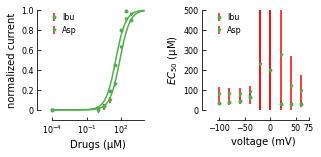

In [147]:

fig = plt.figure(figsize=(9, 2.2)) 

 

ax5 = plt.subplot(1,3,1)
plt.xscale('log')
ax6 = plt.subplot(1,3,2)


ylimDose = [0, 1]

## add Km plot 
#### 
ax6.errorbar(KmIbu['Voltages'],KmIbu['mg419-Mean-Km-Ibu'], yerr=KmIbu['mg419-SD-Km-Ibu'],fmt='o', color = colorsSINGLES[0], label= 'Ibu',markersize=SizeOfMarker,ecolor=ErrorColor)
ax6.errorbar(KmAsp['Voltages'],KmAsp['mg419-Mean-Km-Asp'], yerr=KmAsp['mg419-SD-Km-Asp'],fmt='v', color = colorsSINGLES[0], label= 'Asp',markersize=SizeOfMarker,ecolor=ErrorColor)
#ax6.errorbar(KmDiclo['Voltages'],KmDiclo['mg419-Mean-Km-Diclo'], yerr=KmDiclo['mg419-SD-Km-Diclo'], fmt='o', color = 'magenta')
#ax3.errorbar(KmIbu['Voltages'][0:3],KmIbu['mg419-Mean-Km-Ibu'][0:3], yerr=KmIbu['mg419-SD-Km-Ibu'][0:3], fmt='o', color = 'black')
#ax3.errorbar(KmIbu['Voltages'][5:9],KmIbu['mg419-Mean-Km-Ibu'][5:9], yerr=KmIbu['mg419-SD-Km-Ibu'][5:9], fmt='o', color = 'black')
#ax3.set_xlim([0.0000001, 10000])
ax6.set_ylim([0,500])
ax6.set_xlim([-104,75])
#spines
ax6.spines['right'].set_visible(False)                                 
ax6.spines['top'].set_visible(False)
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax6.set_ylabel('$\it{EC}$$_{50}$ (µM)',fontsize=AxisLabelSize)
ax6.set_xticks([-100,-50,0, 50,75])
ax6.legend()
ax6.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) #
ax6.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.1, 1.05),handletextpad=0.05,fontsize=AxisLegendSize)

#add Data and error bars
ax5.errorbar(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], yerr=mg419_Ibu_Min100['SEM-mg419-Ibu-Min100'], fmt='o', color = colorsSINGLES[0], label= 'Ibu',markersize=SizeOfMarker,ecolor=ErrorColor,clip_on=False)
ax5.errorbar(mg419_Asp_Min100['concMicroMolar'],mg419_Asp_Min100['Avg-mg419-Asp-Min100'], yerr=mg419_Asp_Min100['SEM-mg419-Asp-Min100'], fmt='v', color = colorsSINGLES[0], label= 'Asp',markersize=SizeOfMarker,ecolor=ErrorColor,clip_on=False)
#ax5.errorbar(mg419_Diclo_Min100['concMicroMolar'],mg419_Diclo_Min100['Avg-mg419-Diclo-Min100'], yerr=mg419_Diclo_Min100['SEM-mg419-Diclo-Min100'], fmt='o', color = 'magenta')
#plt.scatter(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], color = 'black')

ax5.set_xlim([0.0001, 10000])
ax5.set_ylim(ylimDose)
#spines
ax5.spines['right'].set_visible(False)                                 
ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax5.set_xlabel('Drugs (µM)',fontsize=AxisLabelSize)
#ax5.yaxis.set_visible(False)
#ax5.spines['left'].set_position(('data', 0))
ax5.set_ylabel('normalized current',fontsize=AxisLabelSize)
#ax5.text(-2.4, -2.35,'normalized Current',fontsize=AxisLabelSize)
ax5.legend()
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax5.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.1, 1.05),handletextpad=0.05,fontsize=AxisLegendSize)





plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax5.get_xticklabels()]
print(labels)
# labels[1] = '0'
# ax5.set_xticklabels(labels)



#### plot 6
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
#ax5.set_title("add legend drugs")
#a21.set_title('bla',size=18)
#ax2.set_xticklabels(["VOltages"],rotation=30)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
#add x and y labels
#plt.ylabel('Reversal Potential (mV)', fontsize=14) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=14)

#set axis
#ax5.set_yticks([0,0.5,1])
#set axis label 0 and not 0.00
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax5.get_yticklabels()]
labels[0] = '0'
ax5.set_yticklabels(labels)

###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

xModel = np.logspace(-4, 4) #same for all

#### Mean Hill values calulated at -100 mV
MeanHillmg419Ibu = np.array([1,  1, KmIbu['mg419-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg419Ibu = Hill(xModel, *MeanHillmg419Ibu) #use fittedParameters or initialParameters(or others preciously calculated)
#### 
MeanHillmg602Ibu = np.array([1,  1, KmIbu['mg602-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg602Ibu = Hill(xModel, *MeanHillmg602Ibu) 
#### 
MeanHillmg687Ibu = np.array([1,  1, 1.95E+01]) # [n,Imax,Km]
y_mg687Ibu = Hill(xModel, *MeanHillmg687Ibu) 

#### ASPIRIN #### 
MeanHillmg419Asp = np.array([1,  1, KmAsp['mg419-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg419Asp = Hill(xModel, *MeanHillmg419Asp) 
###mg602
MeanHillmg602Asp = np.array([1,  1, KmAsp['mg602-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg602Asp = Hill(xModel, *MeanHillmg602Asp) 

# #### Diclofenac#### 
# MeanHillmg419Diclo = np.array([1,  1, KmDiclo['mg419-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg419Diclo = Hill(xModel, *MeanHillmg419Diclo) 
# #### mg602
# MeanHillmg602Diclo = np.array([1,  1, KmDiclo['mg602-Mean-Km-Diclo'][0]]) # [n,Imax,Km]
# y_mg602Diclo = Hill(xModel, *MeanHillmg602Diclo) 

ax5.plot(xModel, y_mg419Ibu, color = colorsSINGLES[0],clip_on=False)
ax5.plot(xModel, y_mg419Asp, color = colorsSINGLES[0],clip_on=False)
#ax5.plot(xModel, y_mg419Diclo, "magenta")
####



# plt.gcf().subplots_adjust(bottom=0.25, left=0.1,hspace=0.6, wspace=0.65) 

###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

#HILLBLOCK
def Hillblock(xb, Imaxb, nb, Kmb):
    return  Imaxb * np.power(Kmb, nb) / (np.power(Kmb, nb) + np.power(xb, nb)) 

xModel = np.logspace(-4, 4) #same for all

#### Mean Hill values calulated at -60 mV
MeanHillmg419EIPA = np.array([1,  1, KmEIPAmg419['mg419-Mean-Km-EIPA'][0]]) # [n,Imax,Km]
y_mg419EIPA = Hillblock(xModel, *MeanHillmg419EIPA) #use fittedParameters or initialParameters(or others preciously calculated)
#### 


### Individual curves
ax3.plot(xModel, y_mg419EIPA, color = colorsSINGLES[0],)


plt.gcf().subplots_adjust(bottom=0.25, left=0.25,hspace=0.7, wspace=0.8) 



plt.savefig(filedirManuscript+"Fig4-M4-Kvalues-IBU-ASP"+'.pdf')


## PANEL H & I

['0.0', '0.5', '1.0']
['$\\mathdefault{10^{-6}}$', '$\\mathdefault{10^{-4}}$', '$\\mathdefault{10^{-2}}$', '$\\mathdefault{10^{0}}$', '$\\mathdefault{10^{2}}$', '$\\mathdefault{10^{4}}$', '$\\mathdefault{10^{6}}$']


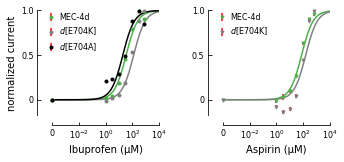

In [138]:
#Plot1
fig = plt.figure(figsize=(5.5, 2.5)) 

# ax1 = plt.subplot(3,4,1)
# for m in range(0,8):
#     plt.plot(Ibumg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0])#
    
# ax2 = plt.subplot(3,4,2)
# for n in range(0,8):
#     plt.plot(Ibumg419IbuMEAN[n][300:1400], color = colorsSINGLES[0])
    
# ax3 = plt.subplot(3,4,5)
# for i in range(0,8):
#     plt.plot(Ibumg602BeforeMEAN[i][300:1400], 'grey')
    
# ax4 = plt.subplot(3,4,6)
# for j in range(0,8):
#     plt.plot(Ibumg602IbuMEAN[j][300:1400], 'grey')



ax7 = plt.subplot(1,2,1)
plt.xscale('log')

ax8 = plt.subplot(1,2,2)
plt.xscale('log')

ylimDose = [-0.17, 1]
AxisTickLabelSize = 8

####
ax7.errorbar(mg419_Ibu_Min100['concMicroMolar'],mg419_Ibu_Min100['Avg-mg419-Ibu-Min100'], yerr=mg419_Ibu_Min100['SEM-mg419-Ibu-Min100'], fmt='o', color = colorsSINGLES[0], markersize=SizeOfMarker,label= 'MEC-4d',ecolor=ErrorColor,clip_on=False)#
ax7.errorbar(mg602_Ibu_Min100['concMicroMolar'],mg602_Ibu_Min100['Avg-mg602-Ibu-Min100'], yerr=mg602_Ibu_Min100['SEM-mg602-Ibu-Min100'], fmt='o', color = 'grey',markersize=SizeOfMarker, label= '$\it{d}$[E704K]',ecolor=ErrorColor,clip_on=False)
ax7.errorbar(mg687_Ibu_Min100['concMicroMolar'],mg687_Ibu_Min100['Avg-mg687-Ibu-Min100'], yerr=mg687_Ibu_Min100['SEM-mg687-Ibu-Min100'], fmt='o', color = 'black',markersize=SizeOfMarker,label= '$\it{d}$[E704A]',ecolor=ErrorColor,clip_on=False)



ax7.set_xlim([0.0001, 10000])
ax7.set_ylim(ylimDose)
#spines
ax7.spines['right'].set_visible(False)                                 
ax7.spines['top'].set_visible(False)
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.set_xlabel('Ibuprofen (µM)',fontsize=AxisLabelSize)
#ax7.set_ylabel('I norm (I/Imax)',fontsize=12)
ax7.set_ylabel('normalized current',fontsize=AxisLabelSize)
#ax7.set_title("add legend mutants")
ax7.legend()
ax7.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.17, 1.05),handletextpad=0.05,fontsize=AxisLegendSize)
ax7.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 

# ax7.text(-2.4, -2.35,'normalized Current',fontsize=AxisLabelSize)# 'I(before) and I(drug)\n (µA) at -85 mV',fontsize=10,rotation=90,ha='center')


#### plot 5
ax8.errorbar(mg419_Asp_Min100['concMicroMolar'],mg419_Asp_Min100['Avg-mg419-Asp-Min100'], yerr=mg419_Asp_Min100['SEM-mg419-Asp-Min100'], fmt='v',color = colorsSINGLES[0],label= 'MEC-4d', markersize=SizeOfMarker,ecolor=ErrorColor,clip_on=False)
ax8.errorbar(mg602_Asp_Min100['concMicroMolar'],mg602_Asp_Min100['Avg-mg602-Asp-Min100'], yerr=mg602_Asp_Min100['SEM-mg602-Asp-Min100'], fmt='v', color = 'grey',markersize=SizeOfMarker, label= '$\it{d}$[E704K]',ecolor=ErrorColor,clip_on=False)


ax8.set_xlim([0.0001, 10000])
ax8.set_ylim(ylimDose)
#spines
ax8.spines['right'].set_visible(False)                                 
ax8.spines['top'].set_visible(False)
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.set_xlabel('Aspirin (µM)',fontsize=AxisLabelSize)
#ax8.set_ylabel('I norm (I/Imax)',fontsize=12)
ax8.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.17, 1.05),handletextpad=0.05,fontsize=AxisLegendSize)
#### plot 6
ax8.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 


#set axis
ax7.set_yticks([0,0.5,1])
ax8.set_yticks([0,0.5,1])

#set axis label 0 and not 0.00
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax7.get_yticklabels()]
labels[0] = '0'
ax7.set_yticklabels(labels)

plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax8.get_yticklabels()]
print(labels)
labels[0] = '0'
ax8.set_yticklabels(labels)

plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax7.get_xticklabels()]
print(labels)
labels[1] = '0'
ax7.set_xticklabels(labels)

plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax8.get_xticklabels()]
#print(labels)
labels[1] = '0'
ax8.set_xticklabels(labels)

###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

xModel = np.logspace(-4, 4) #same for all

#### Mean Hill values calulated at -100 mV
MeanHillmg419Ibu = np.array([1,  1, KmIbu['mg419-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg419Ibu = Hill(xModel, *MeanHillmg419Ibu) #use fittedParameters or initialParameters(or others preciously calculated)
#### 
MeanHillmg602Ibu = np.array([1,  1, KmIbu['mg602-Mean-Km-Ibu'][0]]) # [n,Imax,Km]
y_mg602Ibu = Hill(xModel, *MeanHillmg602Ibu) 
#### 
MeanHillmg687Ibu = np.array([1,  1, 1.95E+01]) # [n,Imax,Km]
y_mg687Ibu = Hill(xModel, *MeanHillmg687Ibu) 

#### ASPIRIN #### 
MeanHillmg419Asp = np.array([1,  1, KmAsp['mg419-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg419Asp = Hill(xModel, *MeanHillmg419Asp) 
###mg602
MeanHillmg602Asp = np.array([1,  1, KmAsp['mg602-Mean-Km-Asp'][0]]) # [n,Imax,Km]
y_mg602Asp = Hill(xModel, *MeanHillmg602Asp) 



### Individual curves
ax7.plot(xModel, y_mg419Ibu, color = colorsSINGLES[0])
ax7.plot(xModel, y_mg602Ibu,'grey')#,linestyle='--'
ax7.plot(xModel, y_mg687Ibu,'black')#,linestyle=':'

ax8.plot(xModel, y_mg419Asp, color = colorsSINGLES[0])
ax8.plot(xModel, y_mg602Asp, "grey")

#ax6.plot(xModel, y_mg419Diclo, "magenta")
#ax6.plot(xModel, y_mg602Diclo, "magenta",linestyle='--')
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.5, wspace=0.6) 

plt.savefig(filedirManuscript+"Fig6-DoseResponseMUTANTS"+'.pdf')



# supplementary figure for EIPA and Benzamil

### Original Traces UNC-8d

### Define Rec number and group number

In [47]:
####### hardcoding ########## FOR NaGLu FIgure 1 ######
#enter here different IDs
#mg419 = M4d (A713T)
pTL69frog = 'STFX035'
pTL69RecNr = '027' 
pTL69Group = 2-1 #Group Number, -1 for python convention

mg419frog = 'STFX035'
mg419RecNr = '002' #'021'
mg419Group = 3-1

In [48]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX'

## find filenames for recordings

In [49]:
#find filename belonging to recording 

pTL69filename = 'REVISEDSensitivityMetadataSTFXUnc8onlySTEP.xlsx'
#pTL69Recording = pTL69frog + pTL69RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
pTL69xl = pd.ExcelFile(filedirMeta+pTL69filename)#converters={'names':str,'ages':str}
pTL69xl.sheet_names
pTL69df = pTL69xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
pTL69Recording = pTL69frog + pTL69RecNr


In [50]:
mg419filename = 'SensitivityMetadataSTFXEIPA.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg419xl = pd.ExcelFile(filedirMeta+mg419filename)#converters={'names':str,'ages':str}
mg419xl.sheet_names
mg419df = mg419xl.parse("Sheet1",converters={'Filename': np.int64}) #calls for Sheet names 
mg419Recording = mg419frog + mg419RecNr


In [51]:
mg419Recording


'STFX035002'

## find filename on metadatasheet

In [52]:
#find the .dat file name in the MetaData sheet of the corresponding recording
pTL69DatFile = pTL69df.Filename[(pTL69df.CellID == pTL69Recording)]

In [53]:
#find the .dat file name in the MetaData sheet of the corresponding recording
mg419DatFile = mg419df.Filename[(mg419df.CellID == mg419Recording)]

In [54]:
pTL69DatFile

1    201708152017
Name: Filename, dtype: int64

### load dat files

In [55]:
# Load a .dat file
pTL69loadFile = heka_reader.Bundle(str(pTL69DatFile.iloc[0])+'.dat')

In [56]:
# Load a .dat file
mg419loadFile = heka_reader.Bundle(str(mg419DatFile.iloc[0])+'.dat')

## WRITE A FOR LOOP WITHIN A FOR LOOP

### UNC8d Bmil

In [57]:
# write for loop within for loop
pTL69Before1 = []
for i in range(0,8):#(0,len(tt)):
    pTL69Before1.append(pTL69loadFile.data[pTL69Group,5,i,0])

In [58]:
pTL69Before2 = []
for i in range(0,8):#(0,len(tt)):
    pTL69Before2.append(pTL69loadFile.data[pTL69Group,6,i,0])

In [59]:
pTL69Before3 = []
for i in range(0,8):#(0,len(tt)):
    pTL69Before3.append(pTL69loadFile.data[pTL69Group,7,i,0])

In [60]:
pTL69Bmil1 = []
for i in range(0,8):#(0,len(tt)):
    pTL69Bmil1.append(pTL69loadFile.data[pTL69Group,37,i,0])

In [61]:
pTL69Bmil2 = []
for i in range(0,8):#(0,len(tt)):
    pTL69Bmil2.append(pTL69loadFile.data[pTL69Group,38,i,0])

In [62]:
pTL69Bmil3 = []
for i in range(0,8):#(0,len(tt)):
    pTL69Bmil3.append(pTL69loadFile.data[pTL69Group,39,i,0])

### MEC4d EIPA

In [63]:
mg419Before1 = []
for i in range(0,8):#(0,len(tt)):
    mg419Before1.append(mg419loadFile.data[mg419Group,1,i,0])
    
mg419Before2 = []
for j in range(0,8):#(0,len(tt)):
    mg419Before2.append(mg419loadFile.data[mg419Group,2,j,0])
    
mg419Before3 = []
for k in range(0,8):#(0,len(tt)):
    mg419Before3.append(mg419loadFile.data[mg419Group,3,k,0])

In [64]:
mg419EIPA1 = []
for i in range(0,8):#(0,len(tt)):
    mg419EIPA1.append(mg419loadFile.data[mg419Group,33,i,0])
    
mg419EIPA2 = []
for j in range(0,8):#(0,len(tt)):
    mg419EIPA2.append(mg419loadFile.data[mg419Group,34,j,0])
    
mg419EIPA3 = []
for k in range(0,8):#(0,len(tt)):
    mg419EIPA3.append(mg419loadFile.data[mg419Group,35,k,0])

### AVERGAGE

In [65]:
pTL69BeforeMEAN =[]
for i in range(0,8):
    pTL69BeforeMEAN.append(((pTL69Before1[i]+pTL69Before2[i]+pTL69Before3[i])/3)*1000000)
    
pTL69BmilMEAN =[]
for j in range(0,8):
    pTL69BmilMEAN.append(((pTL69Bmil1[j]+pTL69Bmil2[j]+pTL69Bmil3[j])/3)*1000000)

In [66]:
#pTL69BmilMEAN =[]
#for i in range(0,8):
 #   pTL69BmilMEAN.append(((pTL69Bmil1[i]+pTL69Bmil2[i]+pTL69Bmil3[i])/3)*1000000)

In [67]:
mg419BeforeMEAN =[]
for i in range(0,8):
    mg419BeforeMEAN.append(((mg419Before1[i]+mg419Before2[i]+mg419Before3[i])/3)*1000000)
    
mg419EIPAMEAN =[]
for j in range(0,8):
    mg419EIPAMEAN.append(((mg419EIPA1[j]+mg419EIPA2[j]+mg419EIPA3[j])/3)*1000000)

You might recall ''a''^2^ `+` ''b''^2^ `=` ''c''^2^ from your math lessons, unless your head is filled with H,,2,,O.


# MAKE SUPPLEMENTARY FIGURE + EXPORT

### both: UNC8 and MEC4

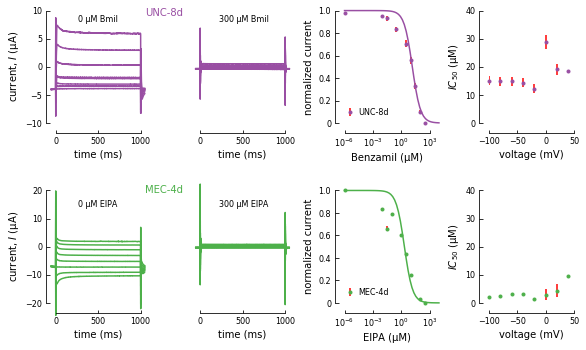

In [124]:


#Plot1

#DEGT-1D
fig = plt.figure(figsize=(9, 7)) 

ax1 = plt.subplot(2,4,5)
for m in range(0,8):
    plt.plot(ModTime,mg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0],clip_on=False)
    
ax2 = plt.subplot(2,4,6)
for n in range(0,8):
    plt.plot(ModTime,mg419EIPAMEAN[n][300:1400], color = colorsSINGLES[0],clip_on=False)
    
ax3 = plt.subplot(2,4,7)
plt.xscale('log')
ax4 = plt.subplot(2,4,8)


#UNC-8D
ax5 = plt.subplot(2,4,1)
for i in range(0,8):
    plt.plot(ModTime,pTL69BeforeMEAN[i][300:1400], color = colorsSINGLES[1],clip_on=False)
ax6 = plt.subplot(2,4,2)
for j in range(0,8):
    plt.plot(ModTime,pTL69BmilMEAN[j][300:1400], color = colorsSINGLES[1],clip_on=False)
ax7 = plt.subplot(2,4,3)
plt.xscale('log')
ax8 = plt.subplot(2,4,4)



##############
ax1.set_ylim([-20, 20])
ax1.set_xlim([0, 1000])
ax1.text(260, 14, '0 µM EIPA', fontsize=AxisLegendSize)#numbers are the values on the axes
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1         
ax1.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax1.set_ylabel('current, $\it{I}$ (µA)',fontsize=AxisLabelSize)
#ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#####

# plt.draw()      # Note, this line is important
# labels = [l.get_text() for l in ax1.get_xticklabels()]
# labels[1] = '0'
# print(labels)
#ax7.set_yticklabels(labels)


##### ax2
ax2.set_ylim([-20, 20])
ax2.set_xlim([0, 1000])
ax2.text(220, 14,  '300 µM EIPA',fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1         
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax2.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax2.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.yaxis.set_visible(False)
ax2.text(-650, 19, 'MEC-4d',color=colorsSINGLES[0],fontsize=AxisLabelSize)
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
############

# ax5.set_xlabel('MAKE NICE',fontsize=12)

# ax6.set_xlabel('MAKE NICE',fontsize=12)
# #ax6.legend(['300 µM Bmil'])
# ax6.text(150, 5, '300 µM Bmil')

#######
##### ax3
ax5.set_ylim([-10, 10])
ax5.set_xlim([0, 1000])
ax5.text(260, 8, '0 µM Bmil', fontsize=AxisLegendSize)
#ax1.set_xlim([300, 1400])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1         
ax5.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax5.set_ylabel('current, $\it{I}$ (µA)',fontsize=AxisLabelSize)
#ax3.spines['bottom'].set_visible(False) 
#ax3.xaxis.set_visible(False)
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 

##### ax2
ax6.set_ylim([-10, +10])
ax6.set_xlim([0, 1000])
ax6.text(220, 8,  '300 µM Bmil', fontsize=AxisLegendSize)
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax6.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax6.set_ylabel('current, $\it{I}$ (µA)',fontsize=AxisLabelSize)
#ax4.spines['bottom'].set_visible(False) 
#ax4.xaxis.set_visible(False)
ax6.spines['left'].set_visible(False) 
ax6.yaxis.set_visible(False)
ax6.text(-650, 9, 'UNC-8d',color = colorsSINGLES[1],fontsize=AxisLabelSize)
ax6.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 




#add Data and error bars
ax3.errorbar(mg419_EIPA_Min60['concMicroMolar'],mg419_EIPA_Min60['Avg-mg419-EIPA-Min60'], yerr=mg419_EIPA_Min60['SEM-mg419-EIPA-Min60'], fmt='o', color = colorsSINGLES[0], label = 'MEC-4d',markersize=SizeOfMarker,ecolor=ErrorColor,
             clip_on=False)
ax3.set_xlim([0.000001, 1000])
ax3.set_ylim([0, 1])
#spines
ax3.spines['right'].set_visible(False)                                 
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
#a2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
ax3.set_xlabel('EIPA (µM)',fontsize=AxisLabelSize)
ax3.set_ylabel('normalized current',fontsize=AxisLabelSize)
ax3.legend()
ax3.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.25, 0.20),handletextpad=0.05,fontsize=AxisLegendSize)
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 

#ax2.set_title("add legend drugs")
#a21.set_title('bla',size=18)
#ax2.set_xticklabels(["VOltages"],rotation=30)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
#add x and y labels
#plt.ylabel('Reversal Potential (mV)', fontsize=14) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=14)


# add Km plot 
#### 
ax4.errorbar(KmEIPAmg419['Voltages'],KmEIPAmg419['mg419-Mean-Km-EIPA'], yerr=KmEIPAmg419['mg419-SEM-Km-EIPA'], fmt='o', color = colorsSINGLES[0],markersize=SizeOfMarker,ecolor=ErrorColor,clip_on=False)
#ax3.errorbar(KmAsp['Voltages'],KmAsp['mg419-Mean-Km-Asp'], yerr=KmAsp['mg419-SD-Km-Asp'], fmt='o', color = 'blue')
#ax3.errorbar(KmDiclo['Voltages'],KmDiclo['mg419-Mean-Km-Diclo'], yerr=KmDiclo['mg419-SD-Km-Diclo'], fmt='o', color = 'magenta')
#ax3.errorbar(KmIbu['Voltages'][0:3],KmIbu['mg419-Mean-Km-Ibu'][0:3], yerr=KmIbu['mg419-SD-Km-Ibu'][0:3], fmt='o', color = 'black')
#ax3.errorbar(KmIbu['Voltages'][5:9],KmIbu['mg419-Mean-Km-Ibu'][5:9], yerr=KmIbu['mg419-SD-Km-Ibu'][5:9], fmt='o', color = 'black')
#ax3.set_xlim([0.0000001, 10000])
ax4.set_ylim([0,40])
ax4.set_xlim([-100,50])
#spines
ax4.spines['right'].set_visible(False)                                 
ax4.spines['top'].set_visible(False)
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax4.set_ylabel('$\it{IC}$$_{50}$ (µM)',fontsize=AxisLabelSize)
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax4.set_xticks([-100,-50,0,50,75])


#### plot 5
ax7.errorbar(pTL69_Bmil_Min60['concMicroMolar'],pTL69_Bmil_Min60['Avg-pTL69-Bmil-Min60'], yerr=pTL69_Bmil_Min60['SEM-pTL69-Bmil-Min60'], fmt='o', color = colorsSINGLES[1], label = 'UNC-8d',markersize=SizeOfMarker,ecolor=ErrorColor,clip_on=False)

ax7.set_xlim([0.000001, 1000])
ax7.set_ylim([0, 1])
#spines
ax7.spines['right'].set_visible(False)                                 
ax7.spines['top'].set_visible(False)
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.set_xlabel('Benzamil (µM)',fontsize=AxisLabelSize)
ax7.set_ylabel('normalized current',fontsize=AxisLabelSize)
ax7.legend()
ax7.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.25, 0.20),handletextpad=0.05,fontsize=AxisLegendSize)
ax7.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax8.set_xticks([-100,-50,0,50,75])
#set axis label 0 and not 0.00

plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax7.get_yticklabels()]
labels[0] = '0'
ax7.set_yticklabels(labels)

plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax3.get_yticklabels()]
labels[0] = '0'
ax3.set_yticklabels(labels)

# plt.draw()      # Note, this line is important
# labels = [l.get_text() for l in ax7.get_xticklabels()]
# #labels[1] = '0'
# print(labels)
# ax7.set_xticklabels(labels)

# plt.draw()      # Note, this line is important
# labels = [l.get_text() for l in ax3.get_xticklabels()]
# labels[1] = '0'
# ax3.set_xticklabels(labels)



#### plot 6
#### 
ax8.errorbar(KmBmilpTL69['Voltages'],KmBmilpTL69['pTL69-Mean-Km-Bmil'], yerr=KmBmilpTL69['pTL69-SEM-Km-Bmil'], fmt='o', color = colorsSINGLES[1],markersize=SizeOfMarker,ecolor=ErrorColor,clip_on=False)
ax8.set_ylim([0,40])
ax8.set_xlim([-100,50])
#sines
ax8.spines['right'].set_visible(False)                                 
ax8.spines['top'].set_visible(False)
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax8.set_ylabel('$\it{IC}$$_{50}$ (µM)',fontsize=AxisLabelSize)
ax8.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 




###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

#HILLBLOCK
def Hillblock(xb, Imaxb, nb, Kmb):
    return  Imaxb * np.power(Kmb, nb) / (np.power(Kmb, nb) + np.power(xb, nb)) 

xModel = np.logspace(-6, 4) #same for all

#### Mean Hill values calulated at -60 mV
MeanHillmg419EIPA = np.array([1,  1, KmEIPAmg419['mg419-Mean-Km-EIPA'][0]]) # [n,Imax,Km]
y_mg419EIPA = Hillblock(xModel, *MeanHillmg419EIPA) #use fittedParameters or initialParameters(or others preciously calculated)
#### 

MeanHillpTL69Bmil = np.array([1,  1, KmBmilpTL69['pTL69-Mean-Km-Bmil'][0]]) # [n,Imax,Km]
y_pTL69Bmil = Hillblock(xModel, *MeanHillpTL69Bmil) #use fittedParameters or initialParameters(or others preciously calculated)
#### 


### Individual curves
ax3.plot(xModel, y_mg419EIPA, color = colorsSINGLES[0],clip_on=False)

ax7.plot(xModel, y_pTL69Bmil, color = colorsSINGLES[1],clip_on=False)


plt.gcf().subplots_adjust(bottom=0.3, left=0.1,hspace=0.6, wspace=0.7) 


plt.savefig(filedirManuscript+"FigX-Supplementary"+'.pdf')


In [86]:
print(pTL69_Bmil_Min60['concMicroMolar'])

0      0.000001
1      0.010000
2      0.030000
3      0.300000
4      3.000000
5     10.000000
6     30.000000
7    100.000000
8    300.000000
Name: concMicroMolar, dtype: float64


In [85]:
print(pTL69_Bmil_Min60['Avg-pTL69-Bmil-Min60'])

0    0.975716
1    0.955157
2    0.930678
3    0.832023
4    0.706143
5    0.558119
6    0.330081
7    0.101545
8    0.000000
Name: Avg-pTL69-Bmil-Min60, dtype: float64


In [69]:
UNC8test = []
for m in range(0,8):
    UNC8test.append(mg419BeforeMEAN[m][350:1400])

 ...]

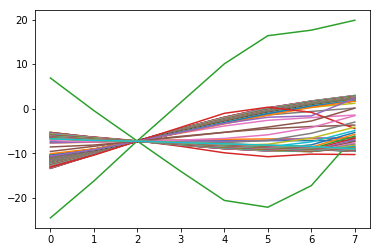

In [70]:
plt.plot(UNC8test)


In [71]:
print(UNC8test[1])

[ -7.34583333  -7.49010417 -16.18333333 ...  -7.09010417  -7.07760417
  -7.078125  ]


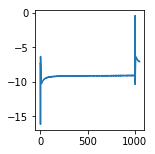

In [72]:
fig = plt.figure(figsize=(9, 2.2)) 

ax1 = plt.subplot(1,4,1)
plt.plot(UNC8test[1])



### only MEC4

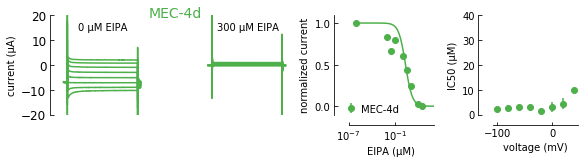

In [73]:


#Plot1

#DEGT-1D
fig = plt.figure(figsize=(9, 2.2)) 

ax1 = plt.subplot(1,4,1)
for m in range(0,8):
    plt.plot(mg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0])
    
ax2 = plt.subplot(1,4,2)
for n in range(0,8):
    plt.plot(mg419EIPAMEAN[n][300:1400], color = colorsSINGLES[0])
    
ax3 = plt.subplot(1,4,3)
plt.xscale('log')
ax4 = plt.subplot(1,4,4)




##############
ax1.set_ylim([-20, 20])
ax1.text(200, 14, '0 µM EIPA')#numbers are the values on the axes
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  

ax1.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax1.set_ylabel('current (µA)',fontsize=AxisLabelSize)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)

##### ax2
ax2.set_ylim([-20, 20])
ax2.text(120, 14,  '300 µM EIPA')
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax2.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax2.set_ylabel('current (µA)',fontsize=AxisLabelSize)
ax2.spines['bottom'].set_visible(False) 
ax2.xaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.yaxis.set_visible(False)
ax2.text(-850, 19, 'MEC-4d',color=colorsSINGLES[0],fontsize=14)

############

# ax5.set_xlabel('MAKE NICE',fontsize=12)

# ax6.set_xlabel('MAKE NICE',fontsize=12)
# #ax6.legend(['300 µM Bmil'])
# ax6.text(150, 5, '300 µM Bmil')




#add Data and error bars
ax3.errorbar(mg419_EIPA_Min60['concMicroMolar'],mg419_EIPA_Min60['Avg-mg419-EIPA-Min60'], yerr=mg419_EIPA_Min60['SEM-mg419-EIPA-Min60'], fmt='o', color = colorsSINGLES[0], label = 'MEC-4d')
ax3.set_xlim([0.0000001, 10000])
ax3.set_ylim([-0.1, 1.1])
#spines
ax3.spines['right'].set_visible(False)                                 
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
#a2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=10)  
ax3.set_xlabel('EIPA (µM)',fontsize=AxisLabelSize)
ax3.set_ylabel('normalized current',fontsize=AxisLabelSize)
ax3.legend()
ax3.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.25, 0.20),handletextpad=0.05)
#ax2.set_title("add legend drugs")
#a21.set_title('bla',size=18)
#ax2.set_xticklabels(["VOltages"],rotation=30)
#ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
#add x and y labels
#plt.ylabel('Reversal Potential (mV)', fontsize=14) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=14)


# add Km plot 
#### 
ax4.errorbar(KmEIPAmg419['Voltages'],KmEIPAmg419['mg419-Mean-Km-EIPA'], yerr=KmEIPAmg419['mg419-SEM-Km-EIPA'], fmt='o', color = colorsSINGLES[0])
#ax3.errorbar(KmAsp['Voltages'],KmAsp['mg419-Mean-Km-Asp'], yerr=KmAsp['mg419-SD-Km-Asp'], fmt='o', color = 'blue')
#ax3.errorbar(KmDiclo['Voltages'],KmDiclo['mg419-Mean-Km-Diclo'], yerr=KmDiclo['mg419-SD-Km-Diclo'], fmt='o', color = 'magenta')
#ax3.errorbar(KmIbu['Voltages'][0:3],KmIbu['mg419-Mean-Km-Ibu'][0:3], yerr=KmIbu['mg419-SD-Km-Ibu'][0:3], fmt='o', color = 'black')
#ax3.errorbar(KmIbu['Voltages'][5:9],KmIbu['mg419-Mean-Km-Ibu'][5:9], yerr=KmIbu['mg419-SD-Km-Ibu'][5:9], fmt='o', color = 'black')
#ax3.set_xlim([0.0000001, 10000])
ax4.set_ylim([0,40])
#spines
ax4.spines['right'].set_visible(False)                                 
ax4.spines['top'].set_visible(False)
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax4.set_ylabel('IC50 (µM)',fontsize=AxisLabelSize)


####



plt.gcf().subplots_adjust(bottom=0.25, left=0.1,hspace=0.6, wspace=0.7) 



###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

#HILLBLOCK
def Hillblock(xb, Imaxb, nb, Kmb):
    return  Imaxb * np.power(Kmb, nb) / (np.power(Kmb, nb) + np.power(xb, nb)) 

xModel = np.logspace(-6, 4) #same for all

#### Mean Hill values calulated at -60 mV
MeanHillmg419EIPA = np.array([1,  1, KmEIPAmg419['mg419-Mean-Km-EIPA'][0]]) # [n,Imax,Km]
y_mg419EIPA = Hillblock(xModel, *MeanHillmg419EIPA) #use fittedParameters or initialParameters(or others preciously calculated)
#### 



### Individual curves
ax3.plot(xModel, y_mg419EIPA, color = colorsSINGLES[0])



plt.savefig(filedirManuscript+"FigX-Supplementary-M4EIPA"+'.pdf')


### only UNC-8

In [74]:
ModTime = np.arange(0-50,1100-50,1)

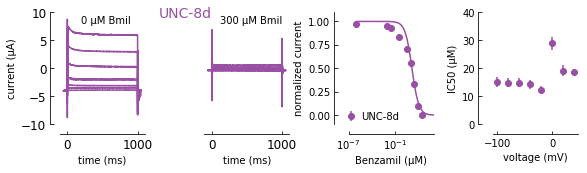

In [75]:

np.arange(0,1000,1)

#Plot1

#DEGT-1D
fig = plt.figure(figsize=(9, 7)) 

# ax1 = plt.subplot(2,4,5)
# for m in range(0,8):
#     plt.plot(mg419BeforeMEAN[m][300:1400], color = colorsSINGLES[0])
    
# ax2 = plt.subplot(2,4,6)
# for n in range(0,8):
#     plt.plot(mg419EIPAMEAN[n][300:1400], color = colorsSINGLES[0])
    
# ax3 = plt.subplot(2,4,7)
# plt.xscale('log')
# ax4 = plt.subplot(2,4,8)


#UNC-8D
ax5 = plt.subplot(2,4,1)
for i in range(0,8):
    plt.plot(ModTime,pTL69BeforeMEAN[i][300:1400], color = colorsSINGLES[1])
ax6 = plt.subplot(2,4,2)
for j in range(0,8):
    plt.plot(ModTime,pTL69BmilMEAN[j][300:1400], color = colorsSINGLES[1])
ax7 = plt.subplot(2,4,3)
plt.xscale('log')
ax8 = plt.subplot(2,4,4)



############

#######
##### ax3
ax5.set_ylim([-10, 10])
ax5.text(200, 8, '0 µM Bmil')
#ax1.set_xlim([300, 1400])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
# #ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax5.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax3.spines['bottom'].set_visible(False) 
#ax3.xaxis.set_visible(False)

##### ax2
ax6.set_ylim([-10, +10])
ax6.text(120, 8,  '300 µM Bmil')
# ax1.set_ylim([-150, 150])
#ax1.set_xlim([300, 1400])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
#ax1.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=12)  
#ax2.text(1300, 20, 'MEC-4d',color=colorsSINGLES[0])
ax6.set_xlabel('time (ms)',fontsize=AxisLabelSize)
ax6.set_ylabel('current (µA)',fontsize=AxisLabelSize)
#ax4.spines['bottom'].set_visible(False) 
#ax4.xaxis.set_visible(False)
ax6.spines['left'].set_visible(False) 
ax6.yaxis.set_visible(False)
ax6.text(-750, 9, 'UNC-8d',color = colorsSINGLES[1],fontsize=14)



# add Km plot 


####

#### plot 5
ax7.errorbar(pTL69_Bmil_Min60['concMicroMolar'],pTL69_Bmil_Min60['Avg-pTL69-Bmil-Min60'], yerr=pTL69_Bmil_Min60['SEM-pTL69-Bmil-Min60'], fmt='o', color = colorsSINGLES[1], label = 'UNC-8d')

ax7.set_xlim([0.0000001, 10000])
ax7.set_ylim([-0.1, 1.1])
#spines
ax7.spines['right'].set_visible(False)                                 
ax7.spines['top'].set_visible(False)
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.set_xlabel('Benzamil (µM)',fontsize=AxisLabelSize)
ax7.set_ylabel('normalized current',fontsize=AxisLabelSize)
ax7.legend()
ax7.legend(frameon=False,loc='upper center', bbox_to_anchor=(0.25, 0.20),handletextpad=0.05)

#### plot 6
#### 
ax8.errorbar(KmBmilpTL69['Voltages'],KmBmilpTL69['pTL69-Mean-Km-Bmil'], yerr=KmBmilpTL69['pTL69-SEM-Km-Bmil'], fmt='o', color = colorsSINGLES[1])
ax8.set_ylim([0,40])
#sines
ax8.spines['right'].set_visible(False)                                 
ax8.spines['top'].set_visible(False)
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.set_xlabel('voltage (mV)',fontsize=AxisLabelSize)
ax8.set_ylabel('IC50 (µM)',fontsize=AxisLabelSize)


plt.gcf().subplots_adjust(bottom=0.3, left=0.1,hspace=0.6, wspace=0.7) 



###########################################################################################################
#### add Hill Equations to plot
#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * np.power(x, n) / (np.power(Km, n) + np.power(x, n)) 

#HILLBLOCK
def Hillblock(xb, Imaxb, nb, Kmb):
    return  Imaxb * np.power(Kmb, nb) / (np.power(Kmb, nb) + np.power(xb, nb)) 

xModel = np.logspace(-6, 4) #same for all

#### Mean Hill values calulated at -60 mV

MeanHillpTL69Bmil = np.array([1,  1, KmBmilpTL69['pTL69-Mean-Km-Bmil'][0]]) # [n,Imax,Km]
y_pTL69Bmil = Hillblock(xModel, *MeanHillpTL69Bmil) #use fittedParameters or initialParameters(or others preciously calculated)
#### 


### Individual curves

ax7.plot(xModel, y_pTL69Bmil, color = colorsSINGLES[1])



plt.savefig(filedirManuscript+"FigX-Supplementary-UNC8Bmil"+'.pdf')


# how to fit data with the Hill equation example

from this webpage 

https://stackoverflow.com/questions/55078451/how-to-use-curvefit-in-python

In [76]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings

# rename data for simpler code re-use later
xData = mg419_Asp_Min100['concMicroMolar']
yData = mg419_Ibu_Min100['Avg-mg419-Ibu-Min100']

#def func(x, Imax, n, Km): # Hill sigmoidal equation from zunzun.com 
def Hill(x, Imax, n, Km):
    return  Imax * numpy.power(x, n) / (numpy.power(Km, n) + numpy.power(x, n)) 

#n = Hill coeeficient

# these are the same as the scipy defaults
initialParameters = numpy.array([1.0, 1.0, 1.0])
MeanParameters = numpy.array([1,  1, 3.39E+01]) #3.39E+01
# [n,Imax,Km]



###### For Individual Fitting or seeing how good the fit is ########
# do not print unnecessary warnings during curve_fit()
warnings.filterwarnings("ignore")

# curve fit the test data
fittedParameters, pcov = curve_fit(Hill, xData, yData, initialParameters)

modelPredictions = Hill(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

Parameters: [ 0.97403301  1.35110091 31.80676523]
RMSE: 0.03190991193920844
R-squared: 0.9934949888854657



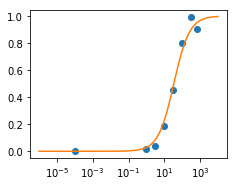

In [77]:
fig = plt.figure(figsize=(12, 6)) 

ax1 = plt.subplot(2,3,1)
plt.xscale('log')
# first the raw data as a scatter plot
ax1.plot(xData, yData,  'o')
# create data for the fitted equation plot
#xModel = numpy.linspace(min(xData), max(xData))

xModel = numpy.logspace(-6, 4)
yModel = Hill(xModel, *MeanParameters) #use fittedParameters or initialParameters(or others preciously calculated)
ax1.plot(xModel, yModel)